# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


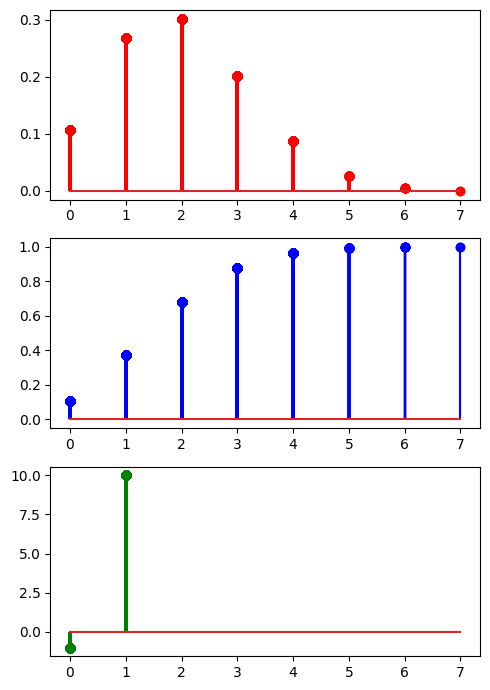

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

In [4]:
# TODO
from scipy.stats import norm

def dnorm(x, mean=0, std=1):
    result = norm.pdf(x, loc =mean, scale= std)
    return result

def pnorm(q, mean = 0, std = 1):
    result = norm.cdf(q, loc= mean, scale =std)
    return result

def qnorm(p, mean= 0, std=1):
    result = norm.ppf(p, loc = mean, scale = std)
    return result

def rnorm(n, mean=0, std=1):
    result = norm.rvs(loc = mean, scale = std, size = n)
    return result

In [5]:

print("dnorm:", dnorm(0, 0, 1))   
print("pnorm:", pnorm(0, 0, 1))   
print("qnorm:", qnorm(0.5, 0, 1))
print("rnorm:", rnorm(10, 0, 1))

dnorm: 0.3989422804014327
pnorm: 0.5
qnorm: 0.0
rnorm: [-0.87798259 -0.82688035 -0.22647889  0.36736551  0.91358463 -0.80317895
  1.49268857 -0.2711236  -0.02136729 -0.74721168]


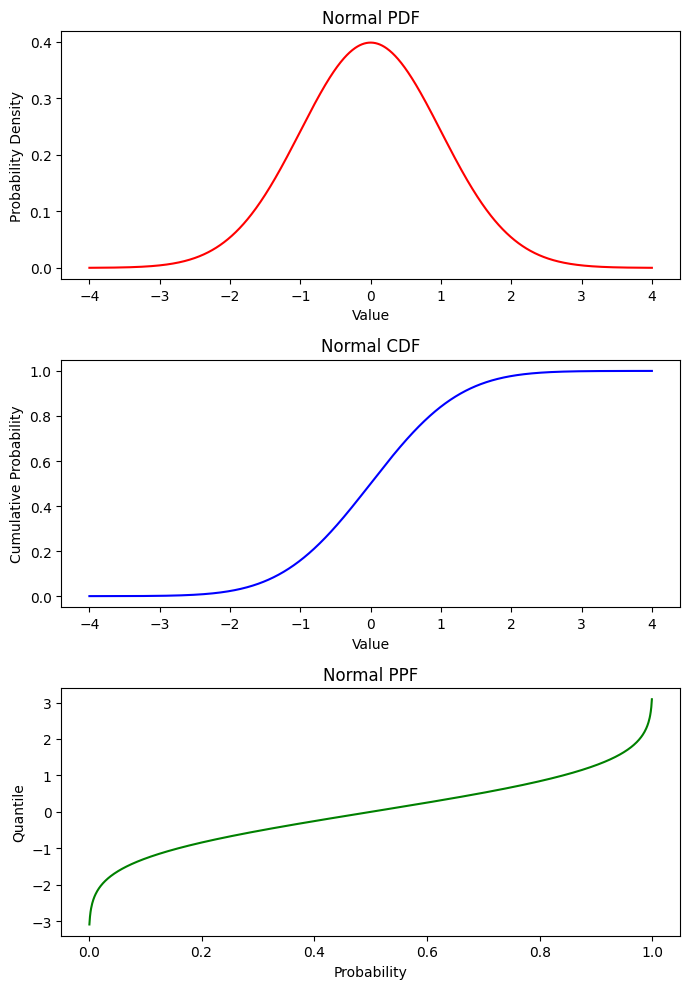

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


def plot_normal(mean=0, std=1, n_samples=1000):
    
    data = norm.rvs(loc=mean, scale=std, size=n_samples)

    x = np.linspace(mean - 4*std, mean + 4*std, 1000)
    pdf = norm.pdf(x, loc=mean, scale=std)
    cdf = norm.cdf(x, loc=mean, scale=std)

    
    p = np.linspace(0, 1, n_samples)
    ppf = norm.ppf(p, loc=mean, scale=std)

    fig, axis = plt.subplots(3, 1, figsize=(7, 10))

    axis[0].plot(x, pdf, 'r-')
    axis[0].set_title('Normal PDF')
    axis[0].set_xlabel('Value')
    axis[0].set_ylabel('Probability Density')

    axis[1].plot(x, cdf, 'b-')
    axis[1].set_title('Normal CDF')
    axis[1].set_xlabel('Value')
    axis[1].set_ylabel('Cumulative Probability')

    
    axis[2].plot(p, ppf, 'g-')
    axis[2].set_title('Normal PPF')
    axis[2].set_xlabel('Probability')
    axis[2].set_ylabel('Quantile')

    
    plt.tight_layout()

    plt.show()


plot_normal(mean=0, std=1)

In [6]:
from scipy.stats import uniform

def duniform(x, a=0, b=1):
   
    result = uniform.pdf(x, loc=a, scale=b-a)
    return result

def puniform(q, a=0, b=1):
    
    result = uniform.cdf(q, loc=a, scale=b-a)
    return result

def quniform(p, a=0, b=1):
    
    result = uniform.ppf(p, loc=a, scale=b-a)
    return result

def runiform(n, a=0, b=1):
   
    result = uniform.rvs(loc=a, scale=b-a, size=n)
    return result 

In [9]:
print("duniform:", duniform(0.5, 0, 1))   
print("puniform:", puniform(0.5, 0, 1))   
print("quniform:", quniform(0.5, 0, 1))   
print("runiform:", runiform(10, 0, 1))

duniform: 1.0
puniform: 0.5
quniform: 0.5
runiform: [0.0336136  0.0626532  0.90643745 0.13924537 0.53242068 0.4110956
 0.34734333 0.89983335 0.0218234  0.66378969]


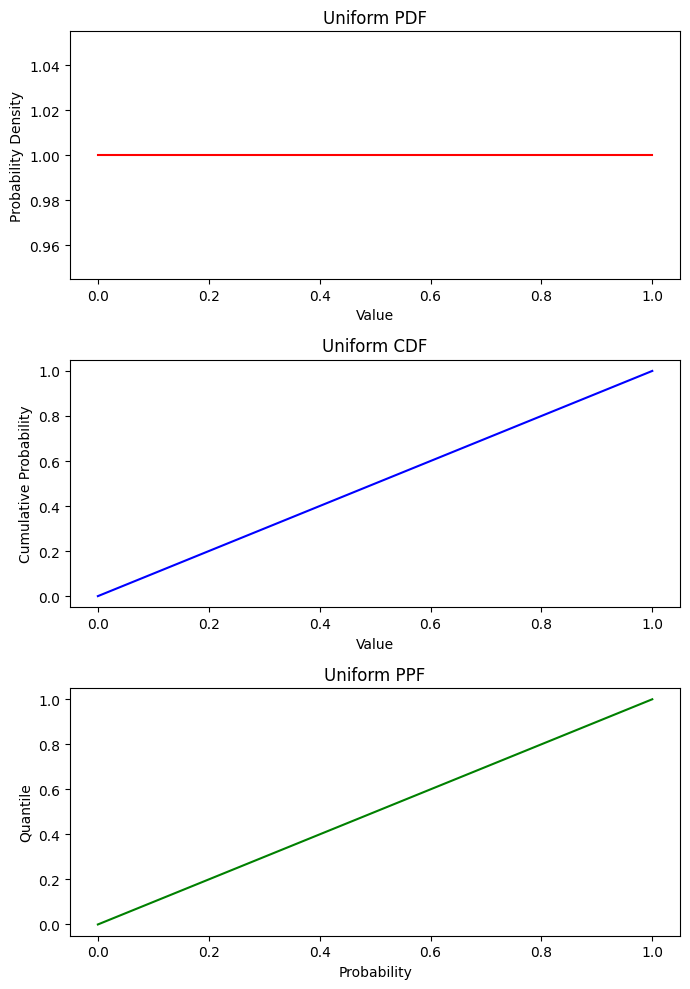

In [15]:
from scipy.stats import uniform


def plot_uniform(a=0, b=1, n_samples=1000):
    
    data = uniform.rvs(loc=a, scale=b-a, size=n_samples)

    
    x = np.linspace(a, b, 1000)
    pdf = uniform.pdf(x, loc=a, scale=b-a)
    cdf = uniform.cdf(x, loc=a, scale=b-a)

    
    p = np.linspace(0, 1, n_samples)
    ppf = uniform.ppf(p, loc=a, scale=b-a)

    fig, axis = plt.subplots(3, 1, figsize=(7, 10))

    
    axis[0].plot(x, pdf, 'r-')
    axis[0].set_title('Uniform PDF')
    axis[0].set_xlabel('Value')
    axis[0].set_ylabel('Probability Density')

    axis[1].plot(x, cdf, 'b-')
    axis[1].set_title('Uniform CDF')
    axis[1].set_xlabel('Value')
    axis[1].set_ylabel('Cumulative Probability')

    axis[2].plot(p, ppf, 'g-')
    axis[2].set_title('Uniform PPF')
    axis[2].set_xlabel('Probability')
    axis[2].set_ylabel('Quantile')

    plt.tight_layout()

    plt.show()

plot_uniform(a=0, b=1)